$\Huge\sf{Tabular\ Playground\ Series\ -\ Jul\ 2022}$

$\large\rm{Practice\ your\ ML\ skills\ on\ this\ approachable\ dataset!}$

# <b>1 <span style='color:#3f4d63'>|</span> Introduction</b>

<div style="color:white;display:fill;
            background-color:#3f4d6f;font-size:150%;
            font-family:Nexa;letter-spacing:0.5px">
    <p style="padding: 8px;color:white;"><b>1.1 | Table of contents</b></p>
</div>

* **<span style = 'color:red'>Exploratory Data Analysis</span>**
    * **Basic information**
    * **Distributions**
        * Skewness and Kurtosis
    * **Dimensionality Reduction. Principal Component Analysis (PCA)**
        * Relationships between features.
        * Applying PCA
    * **Outlier Detection**
        * Univariate Outliers
        * Multivariate Outliers
* **<span style = 'color:red'>Clustering Algorithms</span>**
    * **K-Means**
        * Theory
        * Applying K-Means to our dataset
    * **DBSCAN (Density Based Clustering)**
        * Theory
        * Applying DBSCAN to our dataset
    * **Gaussian mixture models (GMMs)**
        * Theory
        * Applying GMMs to our dataset
    * **Hierarchical Clustering**
        * Theory
* **<span style = 'color:red'>References</span>**

<div style="color:white;display:fill;
            background-color:#3f4d6f;font-size:150%;
            font-family:Nexa;letter-spacing:0.5px">
    <p style="padding: 8px;color:white;"><b>1.2 | About this competition</b></p>
</div>

In this challenge, you are given a dataset where each row belongs to a particular cluster. Your job is to predict the cluster each row belongs to. You are not given any training data, and you are not told how many clusters are found in the ground truth labels. 

![](https://storage.googleapis.com/kaggle-media/competitions/Tabular%20Playground/laura-rivera-ArH3dtoDQc0-unsplash.jpg)

**About the Tabular Playground Series**

Kaggle competitions are incredibly fun and rewarding, but they can also be intimidating for people who are relatively new in their data science journey. In the past, we've launched many Playground competitions that are more approachable than our Featured competitions and thus, more beginner-friendly.

The goal of these competitions is to provide a fun and approachable-for-anyone tabular dataset to model. These competitions are a great choice for people looking for something in between the Titanic Getting Started competition and the Featured competitions. If you're an established competitions master or grandmaster, these probably won't be much of a challenge for you; thus, we encourage you to avoid saturating the leaderboard.

For each monthly competition, we'll be offering Kaggle Merchandise for the top three teams. And finally, because we want these competitions to be more about learning, we're limiting team sizes to 3 individuals.

**Competition Metric**

Submissions are evaluated on the [Adjusted Rand Index](https://scikit-learn.org/stable/modules/clustering.html#clustering-performance-evaluation) between the ground truth cluster labels of the data and your predicted cluster labels. Adjusted Rand Index(ARI) is one of the widely used metrics for validating clustering performance.


<div style="color:white;display:fill;
            background-color:#3f4d6f;font-size:150%;
            font-family:Nexa;letter-spacing:0.5px">
    <p style="padding: 8px;color:white;"><b>1.3 | About clustering</b></p>
</div>

The term clustering refers to a wide range of techniques whose purpose is to find patterns or clusters within a set of observations. The partitions are established in such a way that the observations within the same group are similar to each other and different from the observations in other groups. This is an **unsupervised learning** method, as the process does not take into account to which group each observation actually belongs (if such information exists). This feature is what differentiates clustering from classification methods in which it does employ true classification during training.

Given the usefulness of clustering in many different disciplines (genomics, marketing, etc.), a multitude of variants and adaptations of its methods and algorithms have been developed. Three main groups can be distinguished:

* **Partitioning Clustering:** this type of algorithm requires the user to specify in advance the number of clusters to be created (K-means, K-medoids, CLARA).
* **Hierarchical Clustering:** these types of algorithms do not require the user to specify in advance the number of clusters (agglomerative clustering, divisive clustering).
* **Methods that combine or modify the previous ones**: hierarchical K-means, fuzzy clustering, model based clustering and density based clustering.

<div style="color:white;display:fill;
            background-color:#3f4d6f;font-size:150%;
            font-family:Nexa;letter-spacing:0.5px">
    <p style="padding: 8px;color:white;"><b>1.4 | Limitations of clustering</b></p>
</div>

Clustering can be a very useful tool for finding clusters in data, especially as the volume of data increases. However, it is important to remember its limitations or problems that can arise when applying it. Some of these are:

* **Small decisions can have big consequences:** when using clustering methods, decisions have to be made that greatly influence the results obtained. There is no single right answer, so in practice different options are tried out.

    * Scaling and centring of variables
    * Which measure of distance/similarity to use
    * Number of clusters
    * Type of linkage used in hierarchical clustering
    * At what height to set the cut-off of a dendrogram


* **Validation of the clusters obtained:** it is not easy to check the validity of the results as in most scenarios the true clustering is unknown.

* **Lack of robustness:** K-means-clustering and hierarchical clustering methods necessarily assign each observation to a group. If there is an outlier in the sample, even though it does not really belong to any group, the algorithm will assign it to one of them, causing a significant distortion of the cluster in question. Some alternatives are k-medoids and DBSCAN.

* The nature of the hierarchical clustering algorithm means that, if a bad division is made in the initial steps, it cannot be corrected in the following steps.

<div style="color:white;display:fill;
            background-color:#3f4d6f;font-size:150%;
            font-family:Nexa;letter-spacing:0.5px">
    <p style="padding: 8px;color:white;"><b>1.5 | Importing Packages</b></p>
</div>

In [1]:
import numpy as np
import pandas as pd

from scipy.stats import shapiro
from scipy import stats
from scipy.stats import chi2


from sklearn.cluster import KMeans
from sklearn.preprocessing import PowerTransformer,MinMaxScaler,RobustScaler
from sklearn.model_selection import StratifiedKFold
from sklearn.mixture import BayesianGaussianMixture
from sklearn import metrics
import lightgbm as lgb

import matplotlib.pyplot as plt
import seaborn as sns

from termcolor import colored

import optuna

# Import Dataset

In [2]:
data = pd.read_csv("../input/tabular-playground-series-jul-2022/data.csv", index_col='id')
data.head()

,f_00,f_01,f_02,f_03,f_04,f_05,f_06,f_07,f_08,f_09,...,f_19,f_20,f_21,f_22,f_23,f_24,f_25,f_26,f_27,f_28
id,,,,,,,,,,,,,,,,,,,,,
0,-0.389420,-0.912791,0.648951,0.589045,-0.830817,0.733624,2.258560,2,13,14,...,-0.478412,-0.757002,-0.763635,-1.090369,1.142641,-0.884274,1.137896,1.309073,1.463002,0.813527
1,-0.689249,-0.453954,0.654175,0.995248,-1.653020,0.863810,-0.090651,2,3,6,...,-0.428791,-0.089908,-1.784204,-0.839474,0.459685,1.759412,-0.275422,-0.852168,0.562457,-2.680541
2,0.809079,0.324568,-1.170602,-0.624491,0.105448,0.783948,1.988301,5,11,5,...,-0.413534,-1.602377,1.190984,3.267116,-0.088322,-2.168635,-0.974989,1.335763,-1.110655,-3.630723
3,-0.500923,0.229049,0.264109,0.231520,0.415012,-1.221269,0.138850,6,2,13,...,0.619283,1.287801,0.532837,1.036631,-2.041828,1.440490,-1.900191,-0.630771,-0.050641,0.238333
4,-0.671268,-1.039533,-0.270155,-1.830264,-0.290108,-1.852809,0.781898,8,7,5,...,-1.628830,-0.434948,0.322505,0.284326,-2.438365,1.473930,-1.044684,1.602686,-0.405263,-1.987263


In [3]:
submission = pd.read_csv("/kaggle/input/tabular-playground-series-jul-2022/sample_submission.csv")
submission.head()

,Id,Predicted
0,0,0
1,1,0
2,2,0
3,3,0
4,4,0


# Data Preprocessing

<div style="color:white;display:fill;
            background-color:#506f3f;font-size:150%;
            font-family:Nexa;letter-spacing:0.5px">
    <p style="padding: 4px;color:white;"><b>2.1 Load data</b></p>
</div>

* There are **29** features, all of them masked.
* There are **almost 100,000** data points.

In [4]:
print('Dataframe shape:', data.shape)

Dataframe shape: (98000, 29)


In [5]:
data.describe()

,f_00,f_01,f_02,f_03,f_04,f_05,f_06,f_07,f_08,f_09,...,f_19,f_20,f_21,f_22,f_23,f_24,f_25,f_26,f_27,f_28
count,98000.000000,98000.000000,98000.000000,98000.000000,98000.000000,98000.000000,98000.000000,98000.000000,98000.000000,98000.000000,...,98000.000000,98000.000000,98000.000000,98000.000000,98000.000000,98000.000000,98000.000000,98000.000000,98000.000000,98000.000000
mean,0.001220,0.005580,-0.001042,-0.000700,-0.003522,-0.001612,-0.003042,5.545918,6.763061,8.193163,...,-0.004513,-0.000515,-0.001670,-0.038752,-0.220002,0.166434,-0.064309,-0.062540,0.098472,-0.230910
std,1.002801,1.000742,1.001373,1.000422,1.003061,1.000532,0.997434,3.691840,4.152348,5.904919,...,1.004372,1.002962,0.999703,1.477858,1.494836,1.543014,1.576086,1.428055,1.305407,1.528476
min,-4.732235,-4.202795,-4.377021,-4.010826,-4.535903,-4.300767,-4.894525,0.000000,0.000000,0.000000,...,-4.894525,-4.732235,-4.438130,-6.873999,-8.234305,-7.792363,-6.593842,-7.375719,-7.335556,-6.954151
25%,-0.675226,-0.670985,-0.672779,-0.672540,-0.682510,-0.675066,-0.680421,3.000000,4.000000,4.000000,...,-0.678773,-0.679777,-0.675147,-1.022964,-1.203204,-0.903385,-1.128966,-0.975680,-0.746489,-1.262606
50%,0.002022,0.006650,-0.000324,-0.003185,-0.003307,0.001024,-0.002053,5.000000,6.000000,7.000000,...,-0.000587,-0.000806,0.000819,-0.056687,-0.219046,0.167074,-0.099221,-0.070852,0.082230,-0.271319
75%,0.677271,0.677746,0.677086,0.672097,0.677589,0.673344,0.668112,8.000000,9.000000,11.000000,...,0.672149,0.675437,0.676881,0.930158,0.764690,1.217432,0.987684,0.843212,0.925306,0.770516
max,4.490521,4.324974,4.560247,4.399373,4.050549,4.710316,3.998595,32.000000,30.000000,44.000000,...,4.560247,4.399373,4.135419,6.517721,6.054831,7.527271,7.544731,7.005608,7.205971,6.977150


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 98000 entries, 0 to 97999
Data columns (total 29 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   f_00    98000 non-null  float64
 1   f_01    98000 non-null  float64
 2   f_02    98000 non-null  float64
 3   f_03    98000 non-null  float64
 4   f_04    98000 non-null  float64
 5   f_05    98000 non-null  float64
 6   f_06    98000 non-null  float64
 7   f_07    98000 non-null  int64  
 8   f_08    98000 non-null  int64  
 9   f_09    98000 non-null  int64  
 10  f_10    98000 non-null  int64  
 11  f_11    98000 non-null  int64  
 12  f_12    98000 non-null  int64  
 13  f_13    98000 non-null  int64  
 14  f_14    98000 non-null  float64
 15  f_15    98000 non-null  float64
 16  f_16    98000 non-null  float64
 17  f_17    98000 non-null  float64
 18  f_18    98000 non-null  float64
 19  f_19    98000 non-null  float64
 20  f_20    98000 non-null  float64
 21  f_21    98000 non-null  float64
 22

<div style="color:white;display:fill;
            background-color:#506f3f;font-size:150%;
            font-family:Nexa;letter-spacing:0.5px">
    <p style="padding: 4px;color:white;"><b>2.2 Missing values</b></p>
</div>

There are **no missing values**.

In [7]:
print('MISSING VALUES:')
print(data.isna().sum().sum())

MISSING VALUES:
0


In [8]:
print(f'Duplicates in dataset: {data.duplicated().sum()}, ({np.round(100*data.duplicated().sum()/len(data),1)}%)')

Duplicates in dataset: 0, (0.0%)


In [9]:
data.dtypes

f_00    float64
f_01    float64
f_02    float64
f_03    float64
f_04    float64
f_05    float64
f_06    float64
f_07      int64
f_08      int64
f_09      int64
f_10      int64
f_11      int64
f_12      int64
f_13      int64
f_14    float64
f_15    float64
f_16    float64
f_17    float64
f_18    float64
f_19    float64
f_20    float64
f_21    float64
f_22    float64
f_23    float64
f_24    float64
f_25    float64
f_26    float64
f_27    float64
f_28    float64
dtype: object

# EDA and Visualization

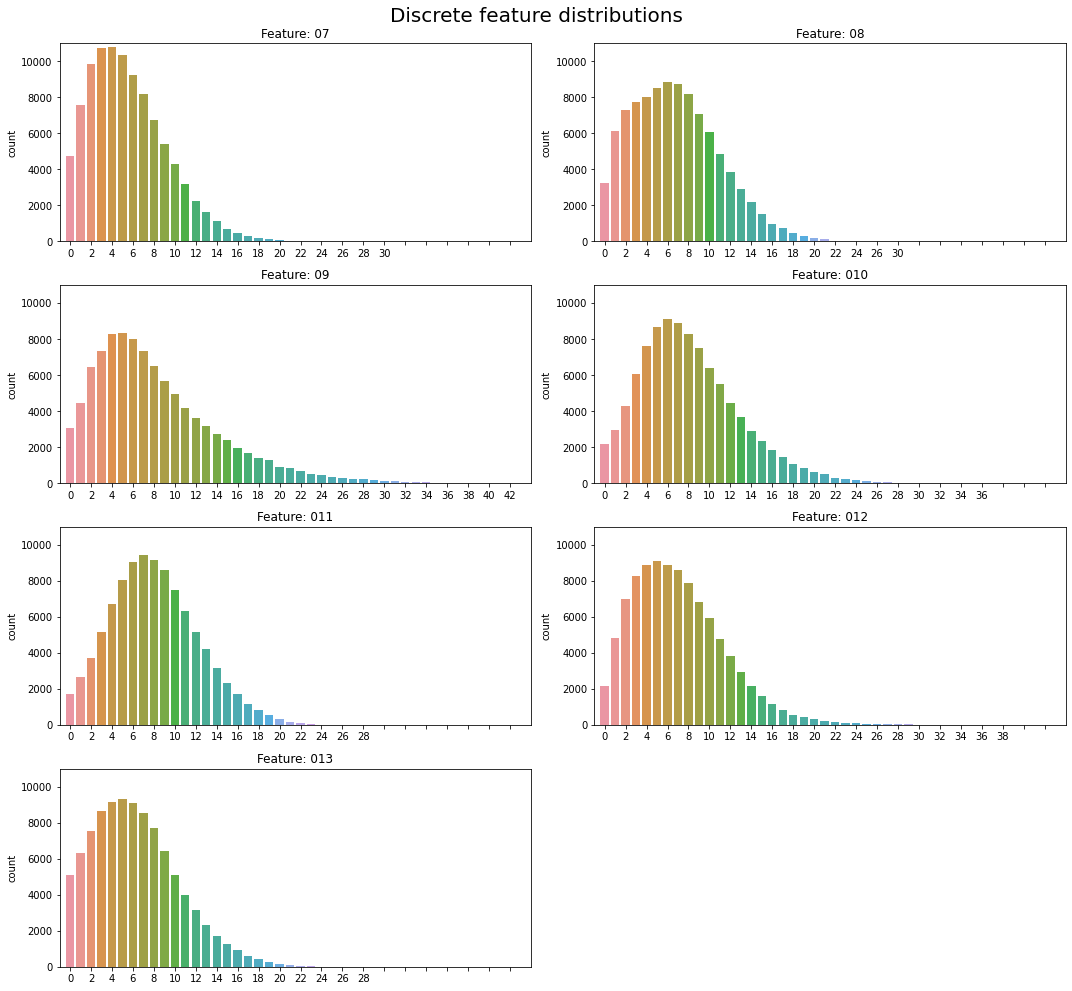

In [10]:
# Figure with subplots
fig=plt.figure(figsize=(15,14))

for i in range(7):
    # New subplot
    plt.subplot(4,2,i+1)
    feat_num=i+7
    sns.countplot(x=data.iloc[:,feat_num])
    
    # Aesthetics
    plt.title(f'Feature: 0{feat_num}')
    plt.xlim([-1,44])      # same scale for all plots
    plt.ylim([0,11000])   # same scale for all plots
    plt.xticks(np.arange(0,44,2))
    plt.xlabel('')
    
# Overall aesthetics
fig.suptitle('Discrete feature distributions',  size=20)
fig.tight_layout()  # Improves appearance a bit
plt.show()

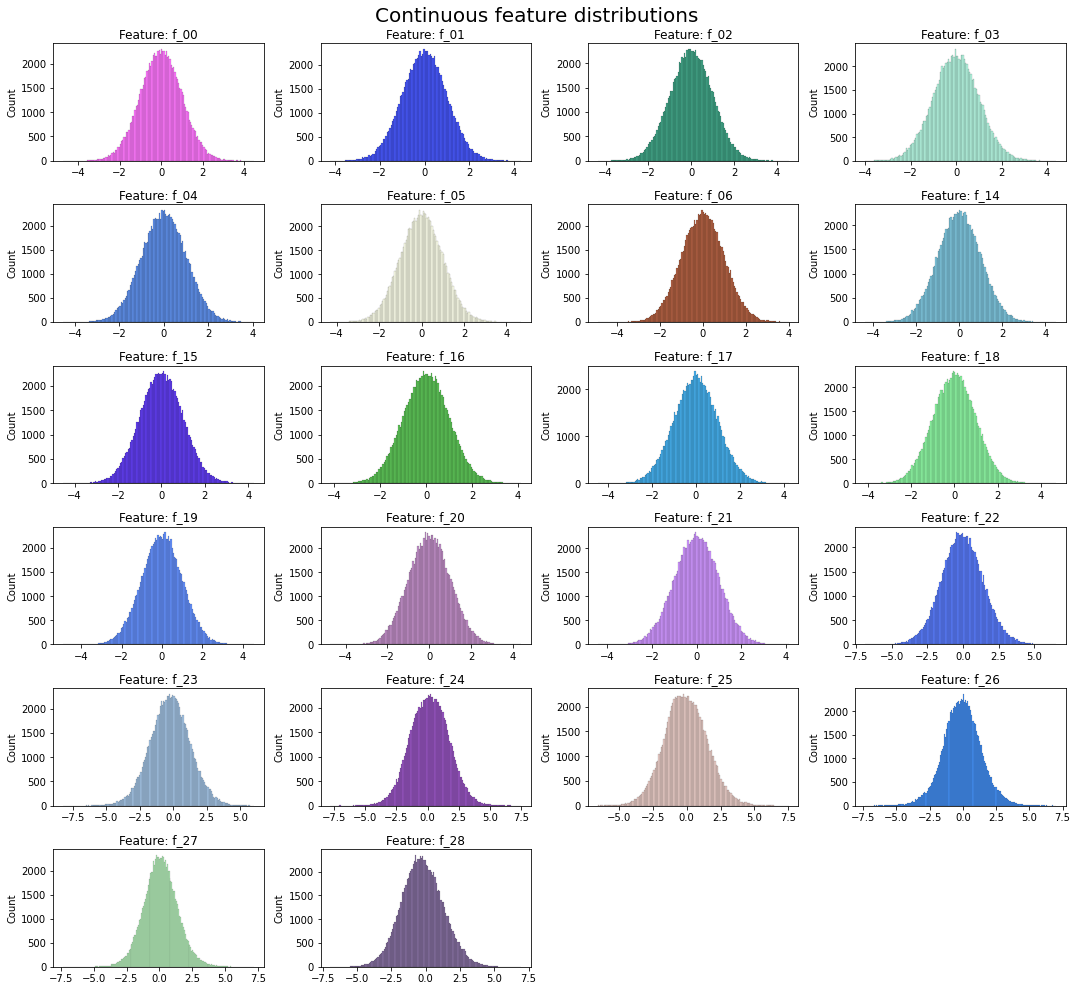

In [11]:
cont_feats=[f'f_0{i}' for i in range(7)]
cont_feats=cont_feats + [f'f_{i}' for i in range(14,29)]

# Figure with subplots
fig=plt.figure(figsize=(15,14))

for i, f in enumerate(cont_feats):
    # New subplot
    plt.subplot(6,4,i+1)
    sns.histplot(x=data[f], color=np.random.rand(3))
    
    # Aesthetics
    plt.title(f'Feature: {f}')
    plt.xlabel('')
    
# Overall aesthetics
fig.suptitle('Continuous feature distributions',  size=20)
fig.tight_layout()  # Improves appearance a bit
plt.show()


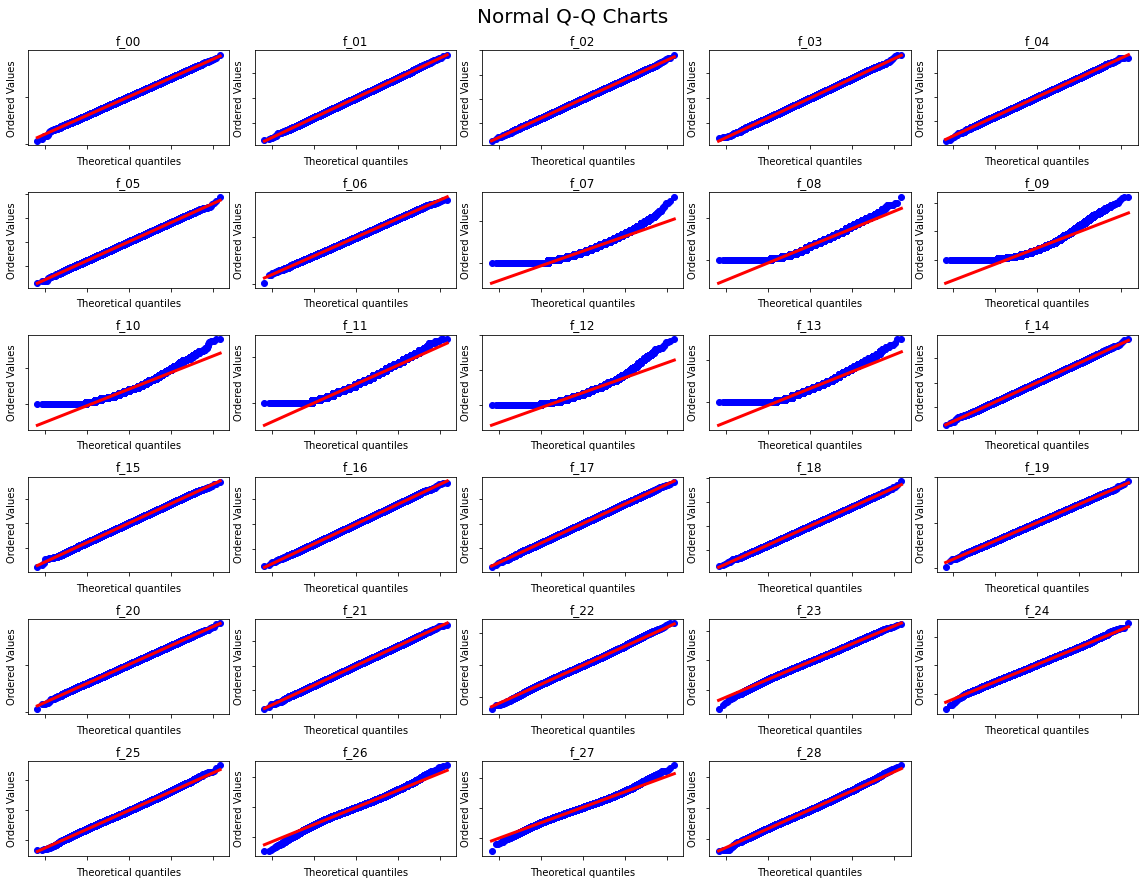

In [12]:
figure = plt.figure(figsize = (16,12))
for i in range(len(data.columns)):
    
    # Q-Q plot
    ax = plt.subplot(6,5, i+1)
    stats.probplot(data.iloc[:,i], dist='norm', plot=plt)
    
    # Aesthetics
    ax.get_lines()[0].set_markersize(6.0)
    ax.get_lines()[1].set_linewidth(3.0)
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    plt.title(data.columns[i])
    
figure.tight_layout(h_pad=1.0, w_pad=0.5)
plt.suptitle('Normal Q-Q Charts', y=1.02, fontsize=20)
plt.show()

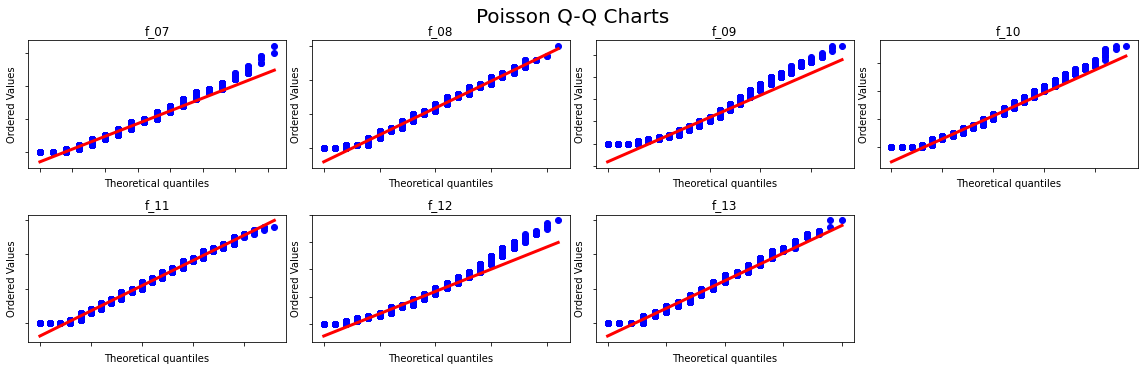

In [13]:
int_feats = ['f_07', 'f_08', 'f_09', 'f_10', 'f_11', 'f_12', 'f_13']


# Poisson Q-Q plots
figure = plt.figure(figsize = (16,5))
for i, col in enumerate(int_feats):
    
    # Q-Q plot
    ax = plt.subplot(2, 4, i+1)
    mu = data[col].mean()
    stats.probplot(data[col], dist='poisson', sparams=(mu,), plot=plt)
    
    # Aesthetics
    ax.get_lines()[0].set_markersize(6.0)
    ax.get_lines()[1].set_linewidth(3.0)
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    plt.title(col)
    
figure.tight_layout(h_pad=1.0, w_pad=0.5)
plt.suptitle('Poisson Q-Q Charts', y=1.02, fontsize=20)
plt.show()

Text(0.5, 1.0, 'Absolute correlations')

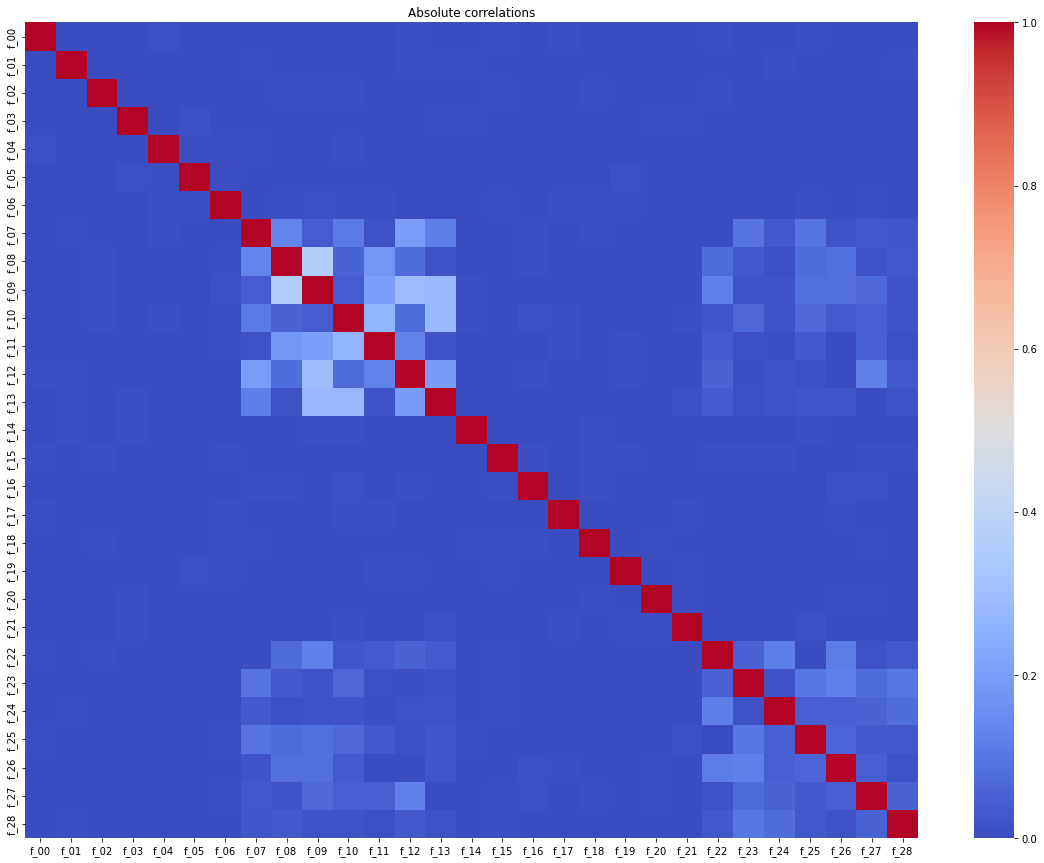

In [14]:
# Heatmap of correlations
plt.figure(figsize=(20, 15))
sns.heatmap(data.corr().abs(), cmap='coolwarm', vmin=0, vmax=1)
plt.title('Absolute correlations')

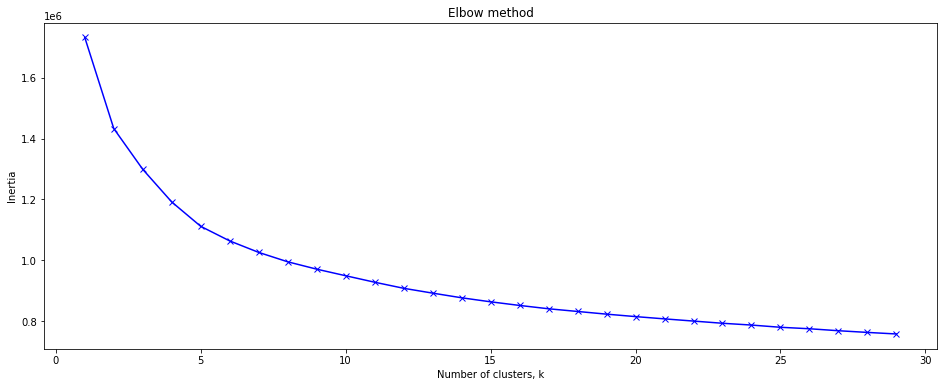

In [15]:
inertias = []
for k in range(1,30):
    km = KMeans(n_clusters=k)
    km.fit(data.iloc[:10000,:])
    inertias.append(km.inertia_)

# Plot inertias
plt.figure(figsize=(16,6))
plt.plot(range(1,30), inertias, 'bx-')
plt.xlabel('Number of clusters, k')
plt.ylabel('Inertia')
plt.title('Elbow method')
plt.show()

In [16]:
for col in data.columns:
    stat, p_value = shapiro(data[col])
    alpha = 0.05    # significance level
    if p_value > alpha: 
        result = colored('Accepted', 'green')  
    else:
        result = colored('Rejected','red')        
    print('Feature: {}\t Hypothesis: {}'.format(col, result))

/opt/conda/lib/python3.7/site-packages/scipy/stats/morestats.py:1760: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


Feature: f_00	 Hypothesis: Accepted
Feature: f_01	 Hypothesis: Accepted
Feature: f_02	 Hypothesis: Accepted
Feature: f_03	 Hypothesis: Accepted
Feature: f_04	 Hypothesis: Accepted
Feature: f_05	 Hypothesis: Accepted
Feature: f_06	 Hypothesis: Accepted
Feature: f_07	 Hypothesis: Rejected
Feature: f_08	 Hypothesis: Rejected
Feature: f_09	 Hypothesis: Rejected
Feature: f_10	 Hypothesis: Rejected
Feature: f_11	 Hypothesis: Rejected
Feature: f_12	 Hypothesis: Rejected
Feature: f_13	 Hypothesis: Rejected
Feature: f_14	 Hypothesis: Accepted
Feature: f_15	 Hypothesis: Accepted
Feature: f_16	 Hypothesis: Accepted
Feature: f_17	 Hypothesis: Accepted
Feature: f_18	 Hypothesis: Accepted
Feature: f_19	 Hypothesis: Accepted
Feature: f_20	 Hypothesis: Accepted
Feature: f_21	 Hypothesis: Accepted
Feature: f_22	 Hypothesis: Rejected
Feature: f_23	 Hypothesis: Rejected
Feature: f_24	 Hypothesis: Rejected
Feature: f_25	 Hypothesis: Rejected
Feature: f_26	 Hypothesis: Rejected
Feature: f_27	 Hypothesis: R

In [17]:
# Discrete features to test
int_feats = ['f_07', 'f_08', 'f_09', 'f_10', 'f_11', 'f_12', 'f_13']

# Univariate poisson test
for col in data[int_feats].columns:
    # Parameters
    alpha = 0.05                  # significance level
    n = len(data[col])            # sample size
    df = n-1                      # degrees of freedom
    
    # Statistics
    mu = data[col].mean()               # sample mean
    D = ((data[col]-mu)**2).sum()/mu    # test statistic
    
    # Two-tailed test
    q_lower = alpha/2
    q_upper = (1-alpha)/2
    
    # percentile point function = inverse of cdata
    chi2_crit_lower = chi2.ppf(q_lower, df)
    chi2_crit_upper = chi2.ppf(q_upper, df)
    
    if (D<chi2_crit_lower) or (D>chi2_crit_upper):
        result = colored('Rejected', 'red')
    else:
        result = colored('Accepted', 'green')
    print('Feature: {}\t Hypothesis: {}'.format(col, result))
    #print('D:',int(D),', chi2_crit_lower:',int(chi2_crit_lower),', chi2_crit_upper:',int(chi2_crit_upper),'\n')

Feature: f_07	 Hypothesis: Rejected
Feature: f_08	 Hypothesis: Rejected
Feature: f_09	 Hypothesis: Rejected
Feature: f_10	 Hypothesis: Rejected
Feature: f_11	 Hypothesis: Rejected
Feature: f_12	 Hypothesis: Rejected
Feature: f_13	 Hypothesis: Rejected


In [18]:
best_cols =['f_07','f_08', 'f_09', 'f_10','f_11', 'f_12', 'f_13', 'f_22','f_23', 'f_24', 'f_25','f_26','f_27', 'f_28']
int_cols=['f_07','f_08', 'f_09', 'f_10','f_11', 'f_12', 'f_13']
float_cols=[col for col in best_cols if col not in int_cols]

def iqr_outliers(df,col_list):
    for col in col_list:
        q1 = df[col].quantile(0.25)
        q3 = df[col].quantile(0.75)
        iqr = q3-q1
        Lower_tail = q1 - 2 * iqr
        Upper_tail = q3 + 2 * iqr
        df.loc[df[col] > Upper_tail,col ]=Upper_tail
        df.loc[df[col] < Lower_tail,col]=Lower_tail
    return df


train=iqr_outliers(data,float_cols)

In [19]:
train.head()

,f_00,f_01,f_02,f_03,f_04,f_05,f_06,f_07,f_08,f_09,...,f_19,f_20,f_21,f_22,f_23,f_24,f_25,f_26,f_27,f_28
id,,,,,,,,,,,,,,,,,,,,,
0,-0.389420,-0.912791,0.648951,0.589045,-0.830817,0.733624,2.258560,2,13,14,...,-0.478412,-0.757002,-0.763635,-1.090369,1.142641,-0.884274,1.137896,1.309073,1.463002,0.813527
1,-0.689249,-0.453954,0.654175,0.995248,-1.653020,0.863810,-0.090651,2,3,6,...,-0.428791,-0.089908,-1.784204,-0.839474,0.459685,1.759412,-0.275422,-0.852168,0.562457,-2.680541
2,0.809079,0.324568,-1.170602,-0.624491,0.105448,0.783948,1.988301,5,11,5,...,-0.413534,-1.602377,1.190984,3.267116,-0.088322,-2.168635,-0.974989,1.335763,-1.110655,-3.630723
3,-0.500923,0.229049,0.264109,0.231520,0.415012,-1.221269,0.138850,6,2,13,...,0.619283,1.287801,0.532837,1.036631,-2.041828,1.440490,-1.900191,-0.630771,-0.050641,0.238333
4,-0.671268,-1.039533,-0.270155,-1.830264,-0.290108,-1.852809,0.781898,8,7,5,...,-1.628830,-0.434948,0.322505,0.284326,-2.438365,1.473930,-1.044684,1.602686,-0.405263,-1.987263


In [20]:
train_scaled=train.copy()
train_scaled[best_cols]= PowerTransformer().fit_transform(train_scaled[best_cols])
train_scaled[best_cols]= MinMaxScaler().fit_transform(train_scaled[best_cols])

In [21]:
train_scaled.head()

,f_00,f_01,f_02,f_03,f_04,f_05,f_06,f_07,f_08,f_09,...,f_19,f_20,f_21,f_22,f_23,f_24,f_25,f_26,f_27,f_28
id,,,,,,,,,,,,,,,,,,,,,
0,-0.389420,-0.912791,0.648951,0.589045,-0.830817,0.733624,2.258560,0.175151,0.588714,0.586435,...,-0.478412,-0.757002,-0.763635,0.404753,0.638146,0.406952,0.632694,0.655791,0.677505,0.628052
1,-0.689249,-0.453954,0.654175,0.995248,-1.653020,0.863810,-0.090651,0.175151,0.208920,0.370471,...,-0.428791,-0.089908,-1.784204,0.430814,0.568713,0.655737,0.500832,0.418572,0.571967,0.278010
2,0.809079,0.324568,-1.170602,-0.624491,0.105448,0.783948,1.988301,0.335412,0.527220,0.332528,...,-0.413534,-1.602377,1.190984,0.845087,0.513011,0.284756,0.433763,0.658701,0.370488,0.179035
3,-0.500923,0.229049,0.264109,0.231520,0.415012,-1.221269,0.138850,0.377866,0.152067,0.564770,...,0.619283,1.287801,0.532837,0.622495,0.314536,0.625911,0.343819,0.443040,0.499071,0.572794
4,-0.671268,-1.039533,-0.270155,-1.830264,-0.290108,-1.852809,0.781898,0.453268,0.387645,0.332528,...,-1.628830,-0.434948,0.322505,0.546364,0.274258,0.629040,0.427031,0.687786,0.456364,0.349529


In [22]:
N_cluster=7

In [23]:
BGM = BayesianGaussianMixture(n_components=N_cluster,covariance_type='full', max_iter=300, random_state=1,n_init = 5)
BGM.fit(train_scaled[best_cols])

predict=BGM.predict(train_scaled[best_cols])
proba=BGM.predict_proba(train_scaled[best_cols])

train_scaled['predict']=predict
train_scaled['predict_proba']=np.max(proba, axis=1) 

train_index=train_scaled[train_scaled.predict_proba > 0.7].index
print(round(len(train_index)/len(train),3))

0.742


In [24]:
N_FOLDS =10
X=train_scaled.loc[train_index][best_cols]
y=train_scaled.loc[train_index]['predict']

params_lgb = {'learning_rate': 0.07,'objective': 'multiclass','boosting': 'gbdt','verbosity': -1,'n_jobs': -1, 'num_classes':N_cluster} 

model_list=[]

gkf = StratifiedKFold(N_FOLDS)
for fold, (train_idx, valid_idx) in enumerate(gkf.split(X,y)):   

    tr_dataset = lgb.Dataset(X.iloc[train_idx],y.iloc[train_idx],feature_name = best_cols)
    vl_dataset = lgb.Dataset(X.iloc[valid_idx],y.iloc[valid_idx],feature_name = best_cols)
    
    model = lgb.train(params = params_lgb, 
                train_set = tr_dataset, 
                valid_sets =  vl_dataset, 
                num_boost_round = 5000, 
                callbacks=[ lgb.early_stopping(stopping_rounds=300, verbose=True), lgb.log_evaluation(period=200)])  
    
    model_list.append(model)

Training until validation scores don't improve for 300 rounds
[200]	valid_0's multi_logloss: 0.0420353
[400]	valid_0's multi_logloss: 0.0253648
[600]	valid_0's multi_logloss: 0.022281
[800]	valid_0's multi_logloss: 0.0221204
[1000]	valid_0's multi_logloss: 0.022443
Early stopping, best iteration is:
[778]	valid_0's multi_logloss: 0.0219442
Training until validation scores don't improve for 300 rounds
[200]	valid_0's multi_logloss: 0.0381044
[400]	valid_0's multi_logloss: 0.0219534
[600]	valid_0's multi_logloss: 0.0187407
[800]	valid_0's multi_logloss: 0.0179452
[1000]	valid_0's multi_logloss: 0.018651
Early stopping, best iteration is:
[810]	valid_0's multi_logloss: 0.0178339
Training until validation scores don't improve for 300 rounds
[200]	valid_0's multi_logloss: 0.0403228
[400]	valid_0's multi_logloss: 0.0232848
[600]	valid_0's multi_logloss: 0.0198201
[800]	valid_0's multi_logloss: 0.0198825
Early stopping, best iteration is:
[699]	valid_0's multi_logloss: 0.0195429
Training unti

In [25]:
lgb_preds=0
for model in model_list:
    lgb_preds+=model.predict(train_scaled[best_cols])

In [26]:
sub=pd.read_csv("../input/tabular-playground-series-jul-2022/sample_submission.csv")
sub['Predicted']=np.argmax(lgb_preds, axis=1)
sub.to_csv("submission.csv",index=False)
sub.head()

,Id,Predicted
0,0,3
1,1,6
2,2,3
3,3,5
4,4,0
